In [2]:
non_discrimination_law="https://www.gesetze-im-internet.de/englisch_agg/englisch_agg.html#p0077"
federal_data_protection_act="https://www.gesetze-im-internet.de/englisch_bdsg/index.html"
criminal_code="https://www.gesetze-im-internet.de/englisch_stgb/englisch_stgb.html"

In [3]:
import requests
import re

# URL of the German Criminal Code in English
url = "https://www.gesetze-im-internet.de/englisch_stgb/englisch_stgb.html"

# Fetch the webpage content
response = requests.get(url)
html_content = response.text

print(html_content)

# Remove HTML tags to get plain text
clean_text = re.sub('<[^<]+?>', '', html_content)

# Define regex pattern to match paragraphs starting with (1), (2), etc., and their corresponding text
paragraph_pattern = r'\(\d+\)\s(.*?)(?=\(\d+\)|$)'

# Find all paragraphs using the regex pattern
paragraphs = re.findall(paragraph_pattern, clean_text, re.DOTALL)

# Clean up paragraphs by stripping whitespace
paragraphs = [para.strip() for para in paragraphs]
print(paragraphs)

# Now, 'paragraphs' contains all the paragraphs starting with (1), (2), etc., and their corresponding text.
# You can print or process them as needed
for idx, paragraph in enumerate(paragraphs):
    print(f"{idx + 1}: {paragraph}\n")


<?xml version="1.0" encoding="iso-8859-1"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><meta content="text/html; charset=iso-8859-1" http-equiv="Content-Type" /><title>German Criminal Code (Strafgesetzbuch &#8211; StGB)</title><link href="../css/style.css" media="screen" rel="stylesheet" type="text/css" /><link href="../css/print_aiz_einzel.css" media="print" rel="stylesheet" type="text/css" /><link href="../css/jnhtml.css" rel="stylesheet" type="text/css" /></head><body><a name="Seitenanfang"><!----></a><div id="fTop"><div id="fTop1"><!----></div><div id="fTop2"><!----></div></div><div id="fTopLogos"><a href="http://www.bmjv.bund.de" target="_blank"><img align="left" border="0" height="104" src="../img/lay/BfJ_2021_WebSVG_en_en.svg" usemap="#imgmap2018913165839" width="230" /><map id="imgmap2018913165839" name="imgmap2018913165839"><area alt="Log

In [4]:
paragraphs

['The penalty and any incidental legal consequences are determined by the law which is in force at the time of the act.',
 'If the threatened penalty is amended during the commission of the act, the law which is in force at the time the act is completed is to be applied.',
 'If the law in force at the time of the completion of the act is amended before judgment, the most lenient law is to be applied.',
 'A law which was intended to be in force only for a determinate time is, as a rule, still to be applied to acts committed whilst it was in force even after it ceases to be in force. This does not apply to the extent that a law provides otherwise.',
 'Subsections',
 'to',
 'apply accordingly to the confiscation and rendering unusable of objects.',
 'Unless otherwise provided by law, decisions as to measures of reform and prevention are to be taken according to the law which is in force at the time of decision.table of contentsSection 3Application to offences committed on German territory

In [5]:
len(paragraphs)

2107

In [6]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")

# Function to tokenize and embed a single paragraph
def tokenize_and_embed(paragraph):
    # Tokenize the paragraph
    tokenized_paragraph = tokenizer(paragraph, padding=True, truncation=True, return_tensors="pt")
    # Generate embeddings
    with torch.no_grad():  # Disable gradient calculations for efficiency
        embedding = model(**tokenized_paragraph)
    # Return the embeddings from the model output (typically use the last hidden state or pooler output)
    return embedding.last_hidden_state.mean(dim=1).squeeze().numpy()  # Average embeddings for each token

# Use map to tokenize and embed each paragraph in the list
embeddings = np.array(list(map(tokenize_and_embed, paragraphs)))

# Print the resulting numpy array of embeddings
print(embeddings)

/home/maria/Documents/LegalRAG/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[[-0.1926875   0.13010204 -0.00623083 ... -0.12318964 -0.09973638
   0.32844037]
 [-0.18218115 -0.14502624  0.03612749 ... -0.3125482  -0.01204249
   0.3999123 ]
 [-0.17242731 -0.09406145  0.00574793 ... -0.21820623  0.06499206
   0.40361607]
 ...
 [-0.01613995  0.22984868 -0.16679813 ... -0.11855979 -0.11708332
  -0.01226366]
 [-0.21304332  0.27895465  0.01028486 ... -0.13354741  0.0298998
   0.25843292]
 [-0.11557705 -0.25250956 -0.02638279 ...  0.19901244  0.00973862
  -0.2630729 ]]


In [7]:
print(embeddings.shape)

(2107, 768)


(2107, 2107)


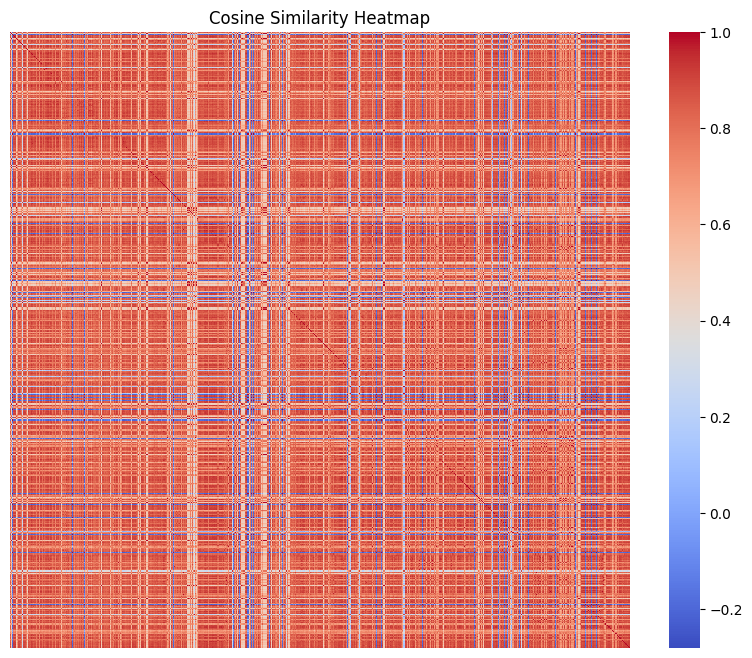

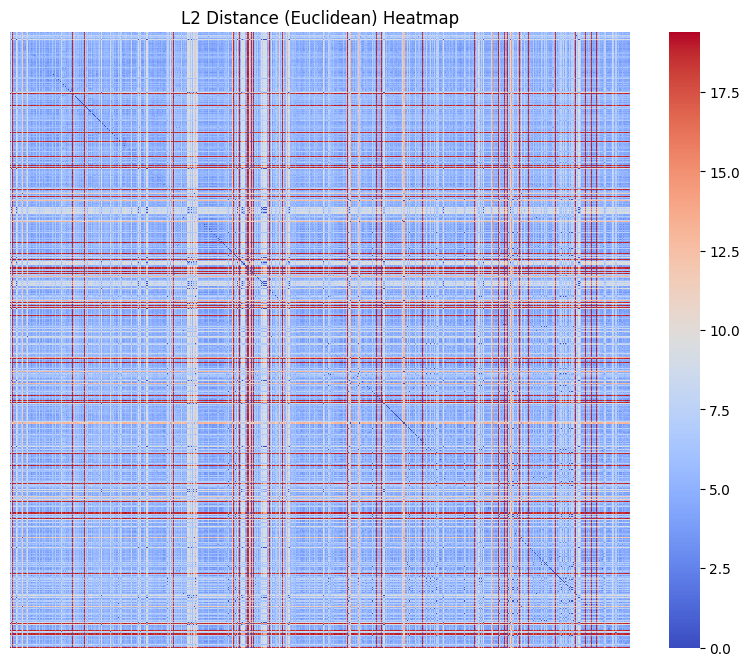

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `embeddings` is a NumPy array with each row as the embedding of a paragraph.

# Calculate cosine similarity (values between -1 and 1)
cos_sim = cosine_similarity(embeddings)
print(cos_sim.shape)

# Calculate L2 distance (Euclidean distance)
l2_dist = euclidean_distances(embeddings)

# Plotting the cosine similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap")
plt.show()

# Plotting the L2 distance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(l2_dist, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("L2 Distance (Euclidean) Heatmap")
plt.show()


In [14]:
import requests
import re

url = "https://www.gesetze-im-internet.de/englisch_bdsg/englisch_bdsg.html"

# Fetch the webpage content
response = requests.get(url)
html_content = response.text

print(html_content)

# Remove HTML tags to get plain text
clean_text = re.sub('<[^<]+?>', '', html_content)

# Define regex pattern to match paragraphs starting with (1), (2), etc., and their corresponding text
paragraph_pattern = r'\(\d+\)\s(.*?)(?=\(\d+\)|$)'

# Find all paragraphs using the regex pattern
paragraphs = re.findall(paragraph_pattern, clean_text, re.DOTALL)

# Clean up paragraphs by stripping whitespace
paragraphs_other = [para.strip() for para in paragraphs]
print(paragraphs)

# Now, 'paragraphs' contains all the paragraphs starting with (1), (2), etc., and their corresponding text.
# You can print or process them as needed
for idx, paragraph in enumerate(paragraphs):
    print(f"{idx + 1}: {paragraph}\n")

<?xml version="1.0" encoding="iso-8859-1"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><meta content="text/html; charset=iso-8859-1" http-equiv="Content-Type" /><title>Federal Data Protection Act (BDSG)</title><link href="../css/style.css" media="screen" rel="stylesheet" type="text/css" /><link href="../css/print_aiz_einzel.css" media="print" rel="stylesheet" type="text/css" /><link href="../css/jnhtml.css" rel="stylesheet" type="text/css" /></head><body><a name="Seitenanfang"><!----></a><div id="fTop"><div id="fTop1"><!----></div><div id="fTop2"><!----></div></div><div id="fTopLogos"><a href="http://www.bmjv.bund.de" target="_blank"><img align="left" border="0" height="104" src="../img/lay/BfJ_2021_WebSVG_en_en.svg" usemap="#imgmap2018913165839" width="230" /><map id="imgmap2018913165839" name="imgmap2018913165839"><area alt="Logo Federal Ministr

In [28]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")

# Function to tokenize and embed a single paragraph
def tokenize_and_embed(paragraph):
    # Tokenize the paragraph
    tokenized_paragraph = tokenizer(paragraph, padding=True, truncation=True, return_tensors="pt")
    # Generate embeddings
    with torch.no_grad():  # Disable gradient calculations for efficiency
        embedding = model(**tokenized_paragraph)
    # Return the embeddings from the model output (typically use the last hidden state or pooler output)
    return embedding.last_hidden_state.mean(dim=1).squeeze().numpy()  # Average embeddings for each token

# Use map to tokenize and embed each paragraph in the list
embeddings_other = np.array(list(map(tokenize_and_embed, paragraphs_other)))

# Print the resulting numpy array of embeddings
print(embeddings_other)

/home/maria/Documents/LegalRAG/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[[-4.53911209e-03  2.25751683e-01 -2.76595131e-02 ...  1.14333294e-01
  -1.46293908e-01  3.46426338e-01]
 [-1.02875747e-01  2.01358035e-01 -2.56582280e-03 ...  1.44219324e-01
   9.43796244e-03  2.78471887e-01]
 [-1.25020951e-01  2.36553639e-01 -5.85362129e-02 ...  4.98836748e-02
   6.34171441e-02  2.50753284e-01]
 ...
 [-3.91204149e-01  2.34889582e-01  8.01533759e-02 ... -2.91210786e-02
   1.50113469e-02  7.67038018e-02]
 [-4.83033240e-01  4.12142813e-01 -3.46918926e-02 ...  3.85312247e-04
  -2.52088040e-01  6.82695359e-02]
 [-2.55890071e-01  4.02879477e-01 -6.11695722e-02 ...  3.28448191e-02
  -1.50666833e-01  2.27198184e-01]]


In [29]:
print(embeddings_other.shape)

(395, 768)


In [30]:
embeddings_total=np.concatenate((embeddings, embeddings_other), axis=0)
print(embeddings_total.shape)

(2502, 768)


(2502, 2502)


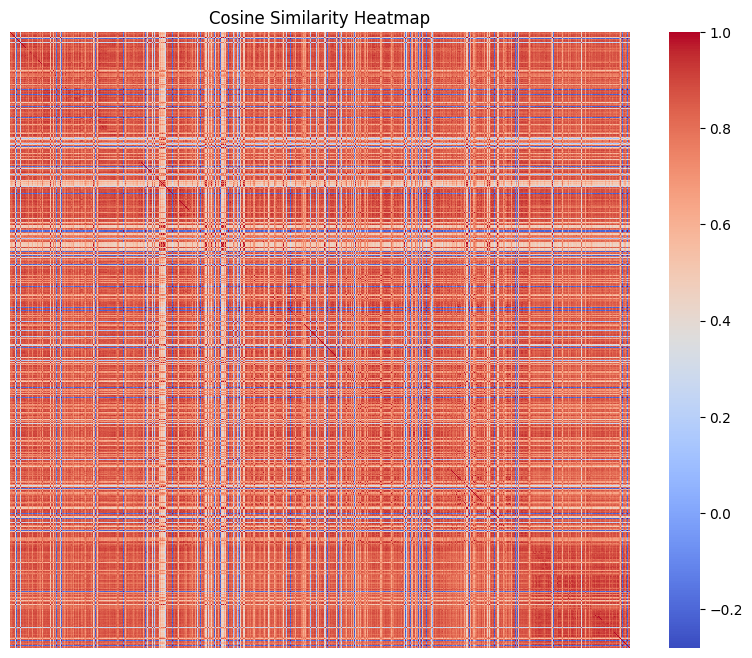

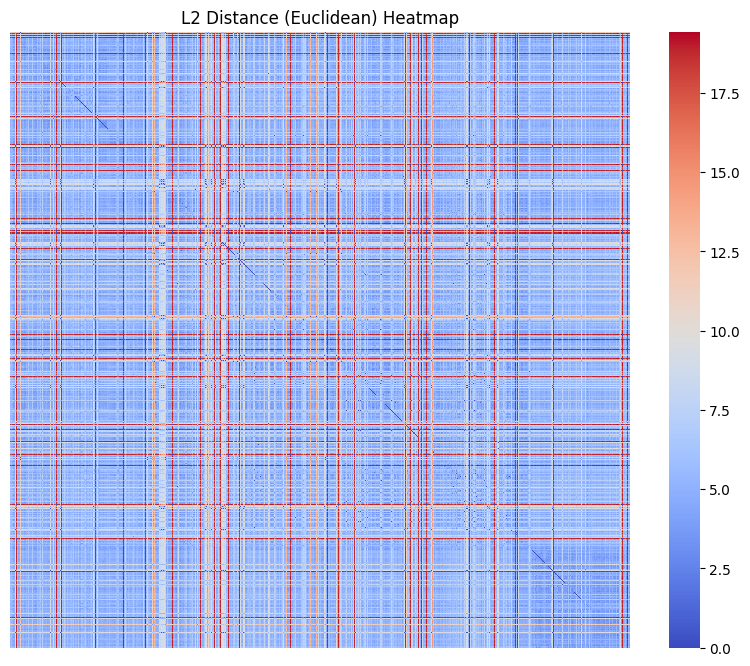

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `embeddings` is a NumPy array with each row as the embedding of a paragraph.

# Calculate cosine similarity (values between -1 and 1)
cos_sim = cosine_similarity(embeddings_total)
print(cos_sim.shape)

# Calculate L2 distance (Euclidean distance)
l2_dist = euclidean_distances(embeddings_total)

# Plotting the cosine similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap")
plt.show()

# Plotting the L2 distance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(l2_dist, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("L2 Distance (Euclidean) Heatmap")
plt.show()

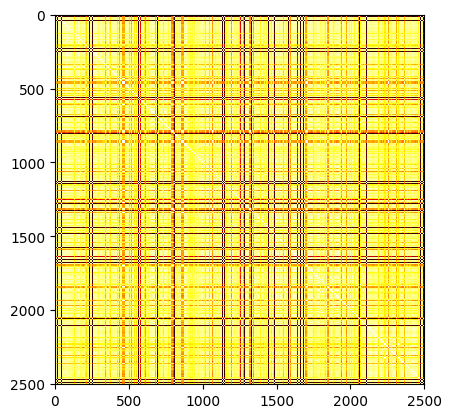

(2502, 2502)


In [27]:
import matplotlib.pyplot as plt
plt.imshow(cos_sim, cmap='hot', interpolation='nearest')
plt.show()
print(cos_sim.shape)